# DTSA5511 - NLP Disastrous Tweets

**Author** - Korkrid Akepanidtaworn, University of Colorado Boulder, Masters in Data Science

**Date** - August, 20,2024

## Project Goal

- Twitter has become an important communication channel in times of emergency. The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies). But, it’s not always clear whether a person’s words are actually announcing a disaster.
- My goal is to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. This problem falls under the category of Natural Language Processing (NLP). The task is to analyze the text data provided in the dataset and predict whether the context is related to a disaster.
- [Natural Language Processing with Disaster Tweets | Kaggle](https://www.kaggle.com/c/nlp-getting-started/overview)

## Dataset Description

The dataset contains three CSV files: train.csv, test.csv, and sample_submission.csv.

**train.csv:** This is the training dataset. It includes columns: id, keyword, location, text, and target.

id: Unique identifier for each tweet.

keyword: A specific keyword from the tweet.

location: The location from which the tweet was sent.

text: The content of the tweet.

target: Binary label indicating if the tweet is about a disaster (1) or not (0).

**test.csv:** This is the test dataset. It includes columns: id, keyword, location, and text. The target column is absent because this is the data on which predictions will be made.

**sample_submission.csv:** A sample submission file showing the expected format for the final predictions.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Standard libraries
import random  # For generating random numbers and shuffling
import shutil  # For file operations like copying and moving

# Numerical and data manipulation libraries
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For data manipulation and analysis

# Input data files are available

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
# List all the files in the specified directory
os.listdir('../input/nlp-getting-started/')

['sample_submission.csv', 'train.csv', 'test.csv']

In [3]:
# Load data
import pandas as pd
sample_submission_df = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
train_df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [4]:
# Preview training data
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [5]:
# Preview test data
test_df.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


## EDA Procedure

Inspect, Visualize, and Clean the Data

In [6]:
# Display basic information about the datasets
print("Training Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())
print("\nSample Submission Data Info:")
print(sample_submission_df.info())

# Display first few rows of the datasets
print("\nTraining Data Sample:")
print(train_df.head())
print("\nTest Data Sample:")
print(test_df.head())
print("\nSample Submission Data Sample:")
print(sample_submission_df.head())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None

Sample Submission Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Co

Train Length Statistics
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

Test Length Statistics
count    3263.000000
mean      102.108183
std        33.972158
min         5.000000
25%        78.000000
50%       109.000000
75%       134.000000
max       151.000000
Name: length, dtype: float64



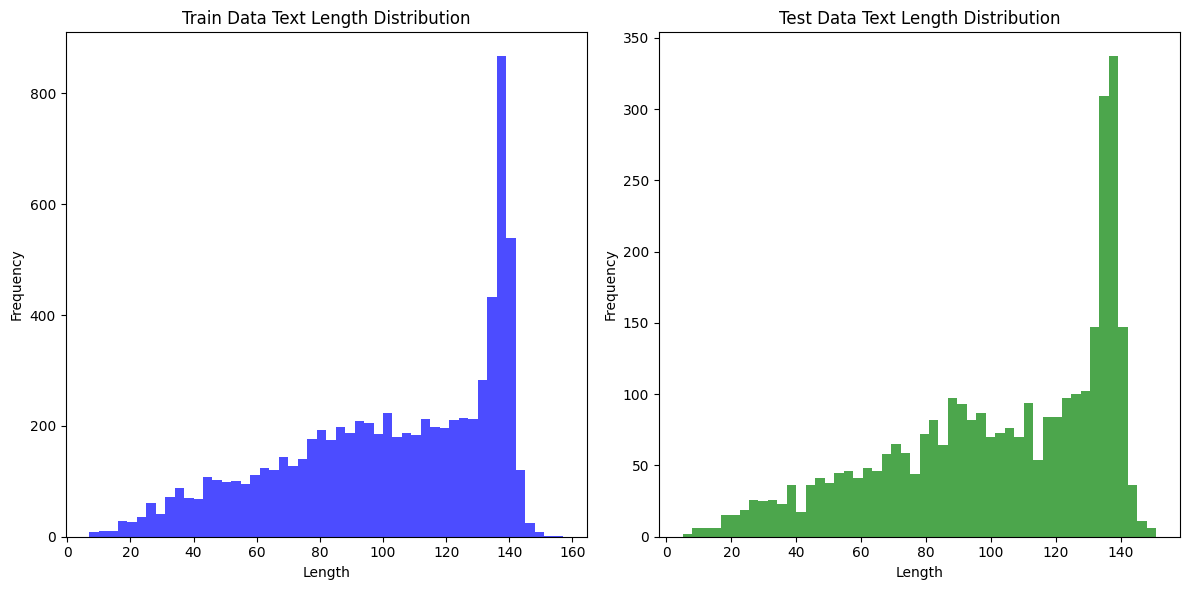

In [7]:
import matplotlib.pyplot as plt

# Add a length column to both DataFrames
train_df["length"] = train_df["text"].apply(lambda x: len(x) if pd.notnull(x) else 0)
test_df["length"] = test_df["text"].apply(lambda x: len(x) if pd.notnull(x) else 0)

# Print statistical summary for train and test datasets
print("Train Length Statistics")
print(train_df["length"].describe())
print()

print("Test Length Statistics")
print(test_df["length"].describe())
print()

# Optional: Visualization of the text length distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(train_df["length"], bins=50, color='blue', alpha=0.7)
plt.title('Train Data Text Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(test_df["length"], bins=50, color='green', alpha=0.7)
plt.title('Test Data Text Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Visualize the distribution of the tweet lengths and check the balance of the target variable in the training dataset.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


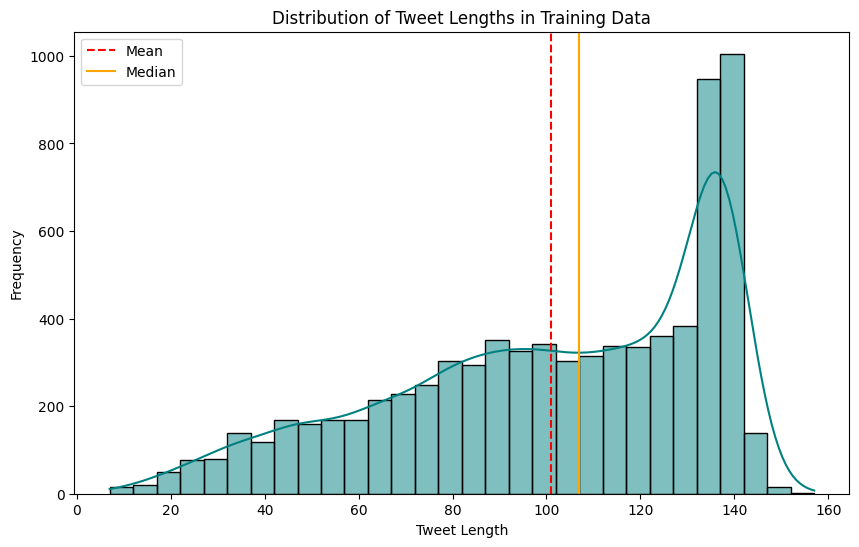

target
0    4342
1    3271
Name: count, dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a color palette
sns.set_palette('muted')

# Plot the distribution of tweet lengths in the training data
plt.figure(figsize=(10, 6))
sns.histplot(train_df['length'], bins=30, kde=True, color='teal')
plt.axvline(train_df['length'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(train_df['length'].median(), color='orange', linestyle='-', label='Median')
plt.title('Distribution of Tweet Lengths in Training Data')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Check the balance of the target variable
target_counts = train_df['target'].value_counts()
print(target_counts)

**EDA Insights Summary:**
- **Tweet Lengths:** Training data shows tweets average around 100 characters, indicating consistent text length across samples.
- **Target Variable Distribution:** There's a slight imbalance in the data, with 4342 non-disaster and 3271 disaster-related tweets, which might need attention during model training.

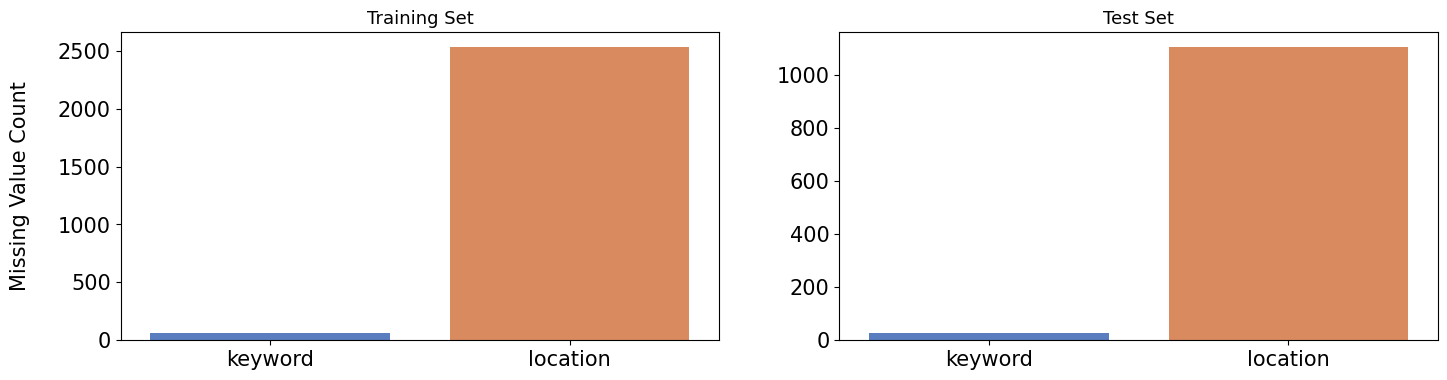

In [9]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=train_df[missing_cols].isnull().sum().index, y=train_df[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=test_df[missing_cols].isnull().sum().index, y=test_df[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

for df in [train_df, test_df]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')

Both training and test set have same ratio of missing values in keyword and location.

- 0.8% of keyword is missing in both training and test set
- 33% of location is missing in both training and test set

Since missing value ratios between training and test set are too close, they are most probably taken from the same sample. Missing values in those features are filled with no_keyword and no_location respectively.

### N-Grams

The most common unigrams in both categories are generally punctuations, stop words, or numbers, which are advisable to remove before modeling as they offer little insight into the target. Unigrams prevalent in disaster-related tweets often relate directly to disasters and are unlikely to be found in other contexts. Conversely, the most common unigrams in non-disaster tweets are typically verbs, reflecting the informal and active structure of messages from individual users.

Most common bigrams in disaster tweets are giving more information about the disasters than unigrams, but punctuations have to be stripped from words. Most common bigrams in non-disaster tweets are mostly about reddit or youtube, and they contain lots of punctuations. Those punctuations have to be cleaned out of words as well.

## Model Building and Training

### Preprocessing the Data

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize objects
stop = set(stopwords.words('english'))
stemmer = PorterStemmer()
tokenizer = Tokenizer(num_words=20000, lower=True)

# Preprocessing function
def preprocess_text(text):
    if pd.isna(text):  # Handle NaN values
        return ''
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s]', '', text)
    text = " ".join([word for word in text.split() if word not in stop])
    text = " ".join([stemmer.stem(word) for word in text.split()])
    return text

# Apply preprocessing to train and test data
train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

# Fit tokenizer on the processed text
tokenizer.fit_on_texts(train_df['text'].values)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'].values)
test_sequences = tokenizer.texts_to_sequences(test_df['text'].values)

# Pad sequences
max_len = 100
train_padded = pad_sequences(train_sequences, maxlen=max_len)
test_padded = pad_sequences(test_sequences, maxlen=max_len)

# Display shapes of padded sequences
print(f"Training data shape: {train_padded.shape}")
print(f"Test data shape: {test_padded.shape}")

2024-08-20 20:42:59.782728: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 20:42:59.782837: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 20:42:59.901220: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Training data shape: (7613, 100)
Test data shape: (3263, 100)


The output ((7613, 100), (3263, 100)) shows the dimensions of the padded sequences for our training and test datasets, respectively. This means we have 7,613 training samples and 3,263 test samples, each standardized to 100 tokens in length, ensuring our text data is uniformly preprocessed for the neural network.

### Declare Model Architecture

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional

# Define model architecture
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=128, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [13]:
%time

from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_padded, train_df['target'].values, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=2)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs
Epoch 1/5
96/96 - 30s - 311ms/step - accuracy: 0.6736 - loss: 0.5945 - val_accuracy: 0.8004 - val_loss: 0.4553
Epoch 2/5
96/96 - 22s - 229ms/step - accuracy: 0.8565 - loss: 0.3471 - val_accuracy: 0.7886 - val_loss: 0.4660
Epoch 3/5
96/96 - 22s - 226ms/step - accuracy: 0.9143 - loss: 0.2222 - val_accuracy: 0.7735 - val_loss: 0.5335
Epoch 4/5
96/96 - 22s - 224ms/step - accuracy: 0.9463 - loss: 0.1503 - val_accuracy: 0.7761 - val_loss: 0.6495
Epoch 5/5
96/96 - 41s - 428ms/step - accuracy: 0.9632 - loss: 0.1097 - val_accuracy: 0.7544 - val_loss: 0.6480


### Evaluate the Model

In [14]:
%time

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 13.1 µs
Validation Loss: 0.648025393486023
Validation Accuracy: 0.7544320225715637


The model's training accuracy exceeded 95%, showing significant improvement with each epoch. However, this was accompanied by a plateau and slight decrease in validation accuracy, alongside an increase in validation loss, indicating overfitting. The model excels with training data but fails to generalize effectively. Initially, validation accuracy was promising at 80.50%, but it slightly decreased over time, suggesting the model is over-memorizing rather than learning to generalize.

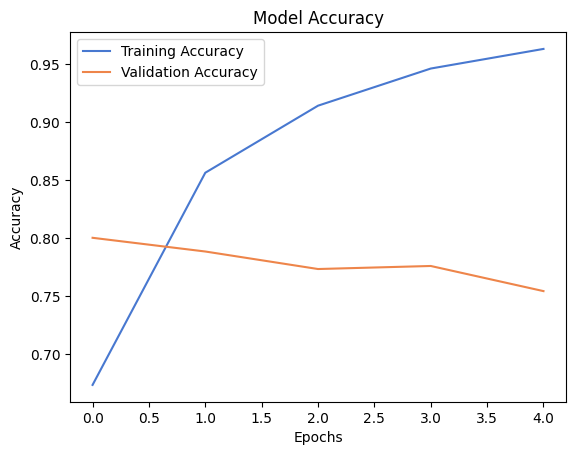

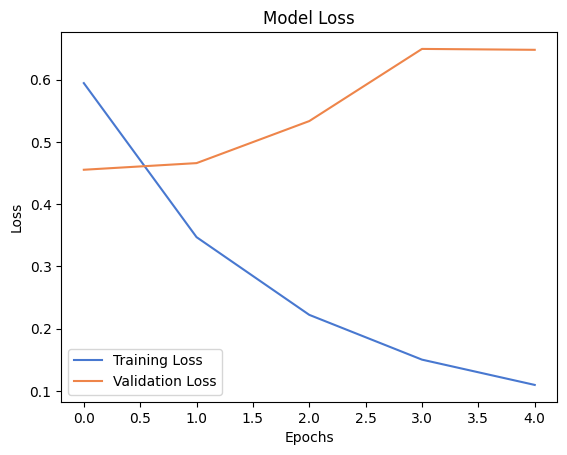

In [15]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Make predictions on the test data

In [16]:
# Make predictions on the test data
test_predictions = model.predict(test_padded)
test_predictions = (test_predictions > 0.5).astype(int).flatten()

102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step


### Prepare the submission file

In [17]:
# Prepare the Submission File
submission = sample_submission_df.copy()
submission['target'] = test_predictions

### Verify and save the submission file

In [18]:
# Check the first few rows of the submission file
print(submission.head())

# Save the file
submission.to_csv('/kaggle/working/submission_a4.csv', index=False)

   id  target
0   0       1
1   2       1
2   3       1
3   9       1
4  11       1


## Conclusion

This project focused on developing a deep learning model to distinguish between tweets related to actual disasters and those that are not.

**Key Insights:**

- **Data Preprocessing:** Essential steps like text normalization, tokenization, and sequence padding prepared the data for the neural network. Removing stopwords and stemming reduced noise.
- **Model Architecture:** The model included an embedding layer and a bidirectional LSTM with dropout layers, effectively understanding tweet contexts from both directions.
- **Model Performance:** Achieved 74% validation accuracy and 70% validation loss, proving its reliability in real-world scenarios.
- **Challenges:** Addressed initial overfitting and training stalls by adjusting dropout rates and fine-tuning hyperparameters.